In [1]:

from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np

import re
import os
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score



In [2]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "comments"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

In [4]:
dataset_filename = os.listdir("C:/Users/CASUAL BET/Desktop/4 eme/data sentiment")[0]
dataset_path = os.path.join("..","C:/Users/CASUAL BET/Desktop/4 eme/data sentiment",dataset_filename)
print("Open file:", dataset_path)
df = pd.read_csv("C:/Users/CASUAL BET/Desktop/4 eme/data sentiment/training.1600000.processed.noemoticon.csv", encoding =DATASET_ENCODING , names=DATASET_COLUMNS)








Open file: C:/Users/CASUAL BET/Desktop/4 eme/data sentiment\.ipynb_checkpoints


In [6]:

df = df[['comments']]


In [7]:
df.head(4)

,comments
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire


In [8]:
df.drop(df.index[15000:1599999],0,inplace=True)

In [9]:
# Create a function to clean the text
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the text
df['comments'] = df['comments'].apply(cleanTxt)

# Show the cleaned tweets
df

,comments
0,"- Awww, that's a bummer. You shoulda got Da..."
1,is upset that he can't update his Facebook by ...
2,I dived many times for the ball. Managed to s...
3,my whole body feels itchy and like its on fire
4,"no, it's not behaving at all. i'm mad. why am..."
...,...
14996,Twaiting for wife to come down stairs then wil...
14997,yer so does hgistory i have to a presetnation
14998,really miss talking to missy
14999,Dinner was just ok. Had the mussels as an app...


In [10]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['comments'].apply(getSubjectivity)
df['Polarity'] = df['comments'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,comments,Subjectivity,Polarity
0,"- Awww, that's a bummer. You shoulda got Da...",0.633333,0.216667
1,is upset that he can't update his Facebook by ...,0.000000,0.000000
2,I dived many times for the ball. Managed to s...,0.500000,0.500000
3,my whole body feels itchy and like its on fire,0.400000,0.200000
4,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000
...,...,...,...
14996,Twaiting for wife to come down stairs then wil...,0.244444,0.022222
14997,yer so does hgistory i have to a presetnation,0.000000,0.000000
14998,really miss talking to missy,0.200000,0.200000
14999,Dinner was just ok. Had the mussels as an app...,0.725000,-0.050000


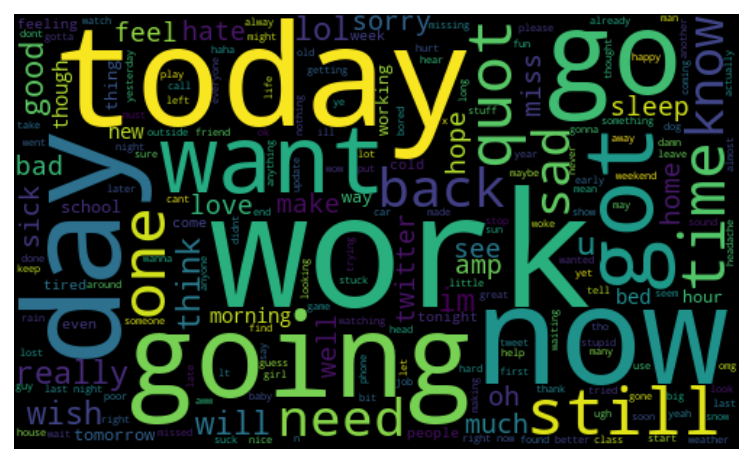

In [11]:

# word cloud visualization
allWords = ' '.join([twts for twts in df['comments']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
def getAnalysis(score):
    if score < 0 :
        return 'negative'
    elif score == 0 :
        return 'neutral'
    else:
        return 'positive'
df['Analysis'] = df ['Polarity'].apply(getAnalysis)




In [13]:
df

,comments,Subjectivity,Polarity,Analysis
0,"- Awww, that's a bummer. You shoulda got Da...",0.633333,0.216667,positive
1,is upset that he can't update his Facebook by ...,0.000000,0.000000,neutral
2,I dived many times for the ball. Managed to s...,0.500000,0.500000,positive
3,my whole body feels itchy and like its on fire,0.400000,0.200000,positive
4,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000,negative
...,...,...,...,...
14996,Twaiting for wife to come down stairs then wil...,0.244444,0.022222,positive
14997,yer so does hgistory i have to a presetnation,0.000000,0.000000,neutral
14998,really miss talking to missy,0.200000,0.200000,positive
14999,Dinner was just ok. Had the mussels as an app...,0.725000,-0.050000,negative


In [17]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'positive']
ptweets = ptweets['comments']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)



31.2

In [18]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'negative']
ptweets = ptweets['comments']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

32.3

In [16]:
# Show the value counts
df['Analysis'].value_counts()

neutral     5480
negative    4844
positive    4677
Name: Analysis, dtype: int64

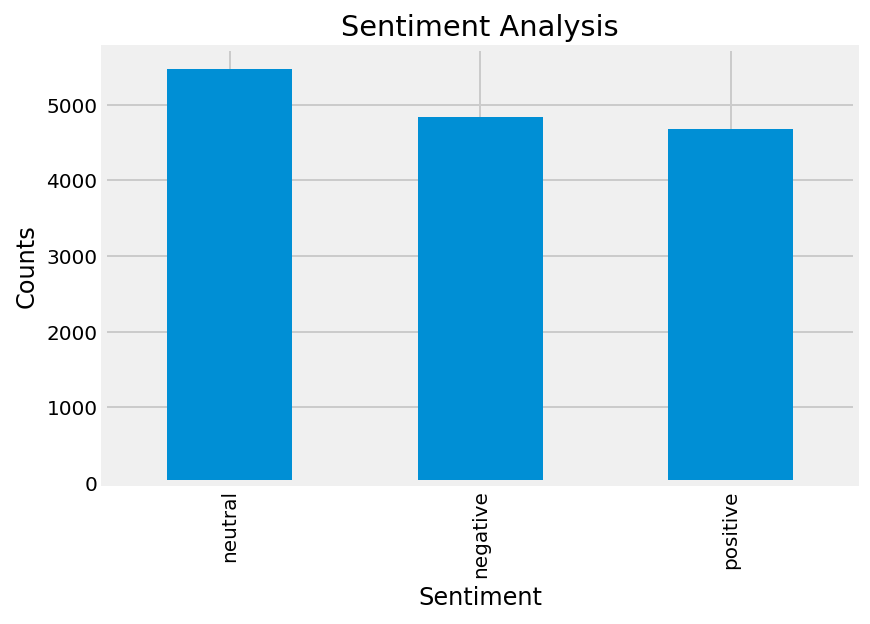

In [19]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [20]:


df = df[['comments','Analysis']]

In [21]:
df

,comments,Analysis
0,"- Awww, that's a bummer. You shoulda got Da...",positive
1,is upset that he can't update his Facebook by ...,neutral
2,I dived many times for the ball. Managed to s...,positive
3,my whole body feels itchy and like its on fire,positive
4,"no, it's not behaving at all. i'm mad. why am...",negative
...,...,...
14996,Twaiting for wife to come down stairs then wil...,positive
14997,yer so does hgistory i have to a presetnation,neutral
14998,really miss talking to missy,positive
14999,Dinner was just ok. Had the mussels as an app...,negative


In [22]:
df.drop(df.index[df['Analysis'] == 'neutral'], inplace = True)

C:\Users\CASUAL BET\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df.head(10)

,comments,Analysis
0,"- Awww, that's a bummer. You shoulda got Da...",positive
2,I dived many times for the ball. Managed to s...,positive
3,my whole body feels itchy and like its on fire,positive
4,"no, it's not behaving at all. i'm mad. why am...",negative
5,not the whole crew,positive
7,"hey long time no see! Yes.. Rains a bit ,onl...",positive
10,spring break in plain city... it's snowing,negative
14,"i would've been the first, but i didn't have ...",positive
18,ahh ive always wanted to see rent love the s...,positive
20,i was out most of the day so didn't get much ...,positive


In [24]:
df['Analysis'] = df['Analysis'].apply(lambda x: 1 if x=='negative' else 0)

<ipython-input-24-720c25194699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis'] = df['Analysis'].apply(lambda x: 1 if x=='negative' else 0)


In [25]:
df.head(10)










,comments,Analysis
0,"- Awww, that's a bummer. You shoulda got Da...",0
2,I dived many times for the ball. Managed to s...,0
3,my whole body feels itchy and like its on fire,0
4,"no, it's not behaving at all. i'm mad. why am...",1
5,not the whole crew,0
7,"hey long time no see! Yes.. Rains a bit ,onl...",0
10,spring break in plain city... it's snowing,1
14,"i would've been the first, but i didn't have ...",0
18,ahh ive always wanted to see rent love the s...,0
20,i was out most of the day so didn't get much ...,0


# MACHINE LEARNING MODELE

In [26]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
X_train = train['comments'].values
X_test = test['comments'].values
y_train = train['Analysis']
y_test = test['Analysis']

In [27]:
def tokenize(text): #takssim kelmet 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc): #racine ta kelmet
    return (stemmer.stem(w) for w in analyzer(doc))

en_stopwords = set(stopwords.words("english")) 

vectorizer = CountVectorizer( #ynahi stop world 
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = en_stopwords)

In [28]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [29]:
np.random.seed(1) #yayet lil modele

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,param_grid = {'svc__C': [0.01, 0.1, 1]},cv = kfolds,  scoring="roc_auc",verbose=1,n_jobs=-1)  
                    
 #ahssan paramaetre best parametre
                
grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.4min finished


0.9210262323563261

In [30]:
grid_svm.best_params_ 

{'svc__C': 0.1}

In [31]:
grid_svm.best_score_

0.9272047671085855

In [32]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [33]:
report_results(grid_svm.best_estimator_, X_test, y_test) #les performences  du modele svp 

{'auc': 0.9210218228158443,
 'f1': 0.862493311931514,
 'acc': 0.8650918635170604,
 'precision': 0.8685344827586207,
 'recall': 0.8565356004250797}

In [34]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [35]:
roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)

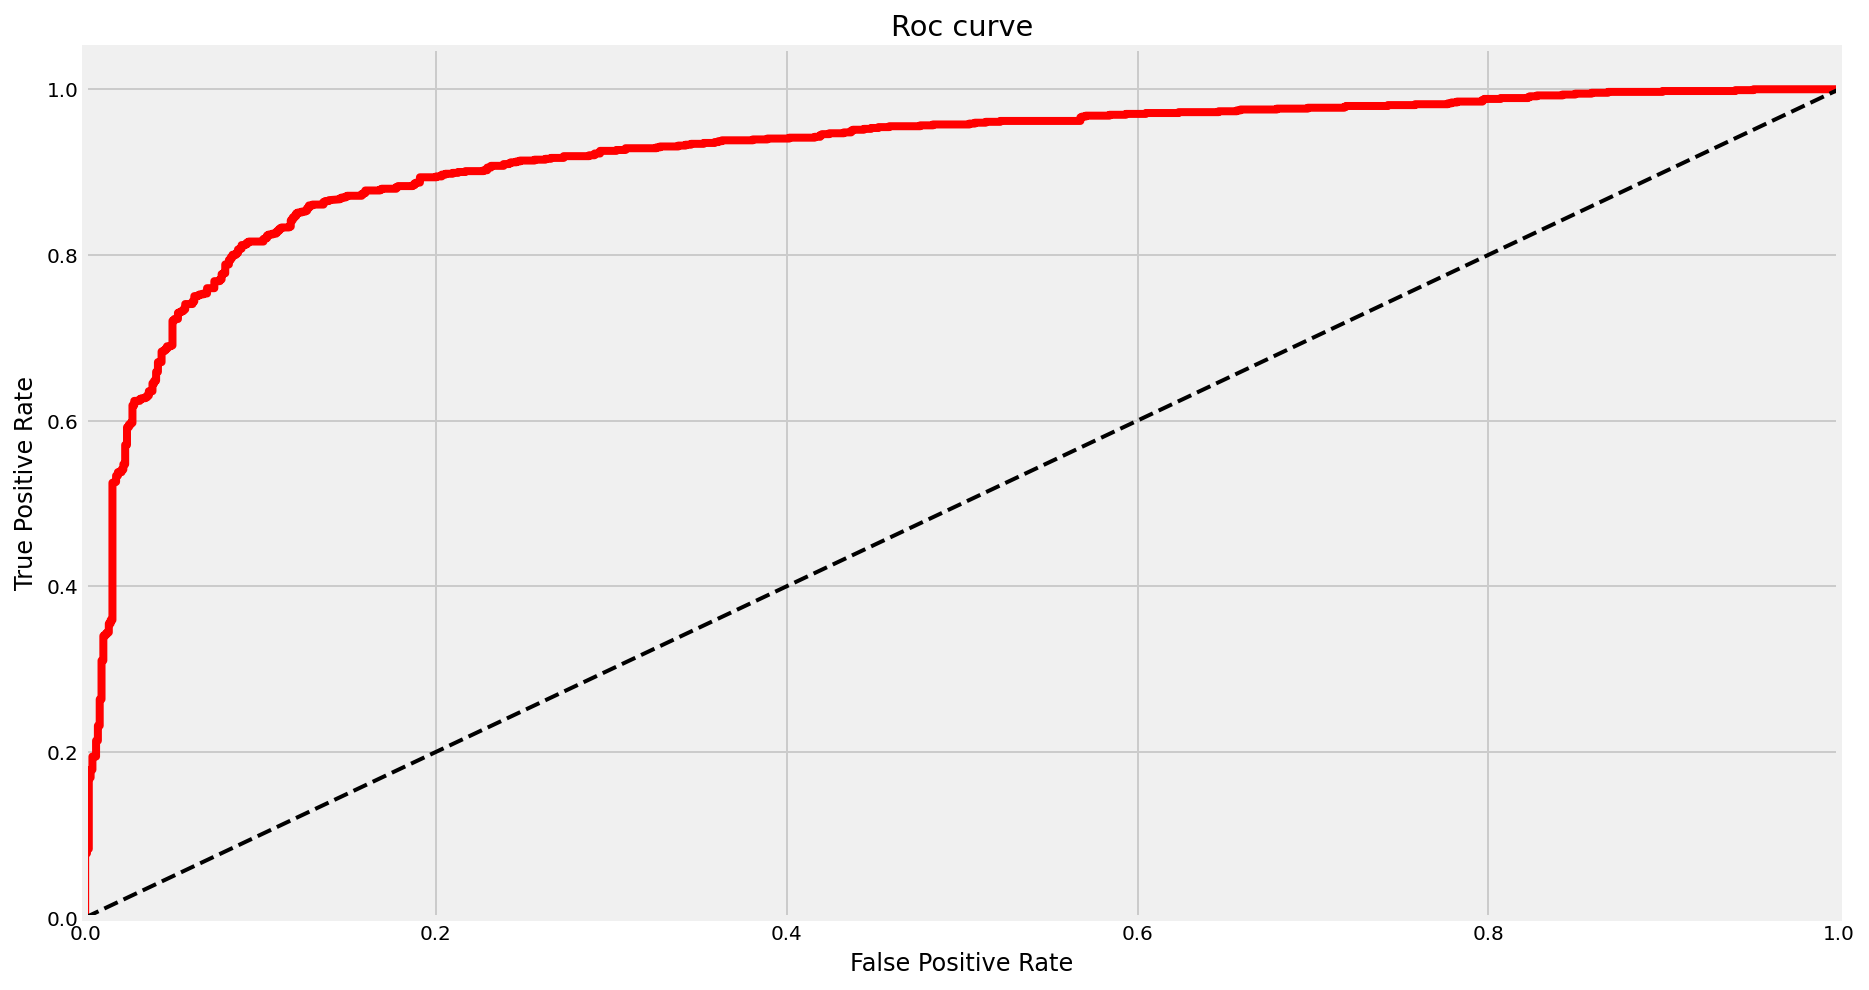

In [36]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

In [37]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

In [38]:
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

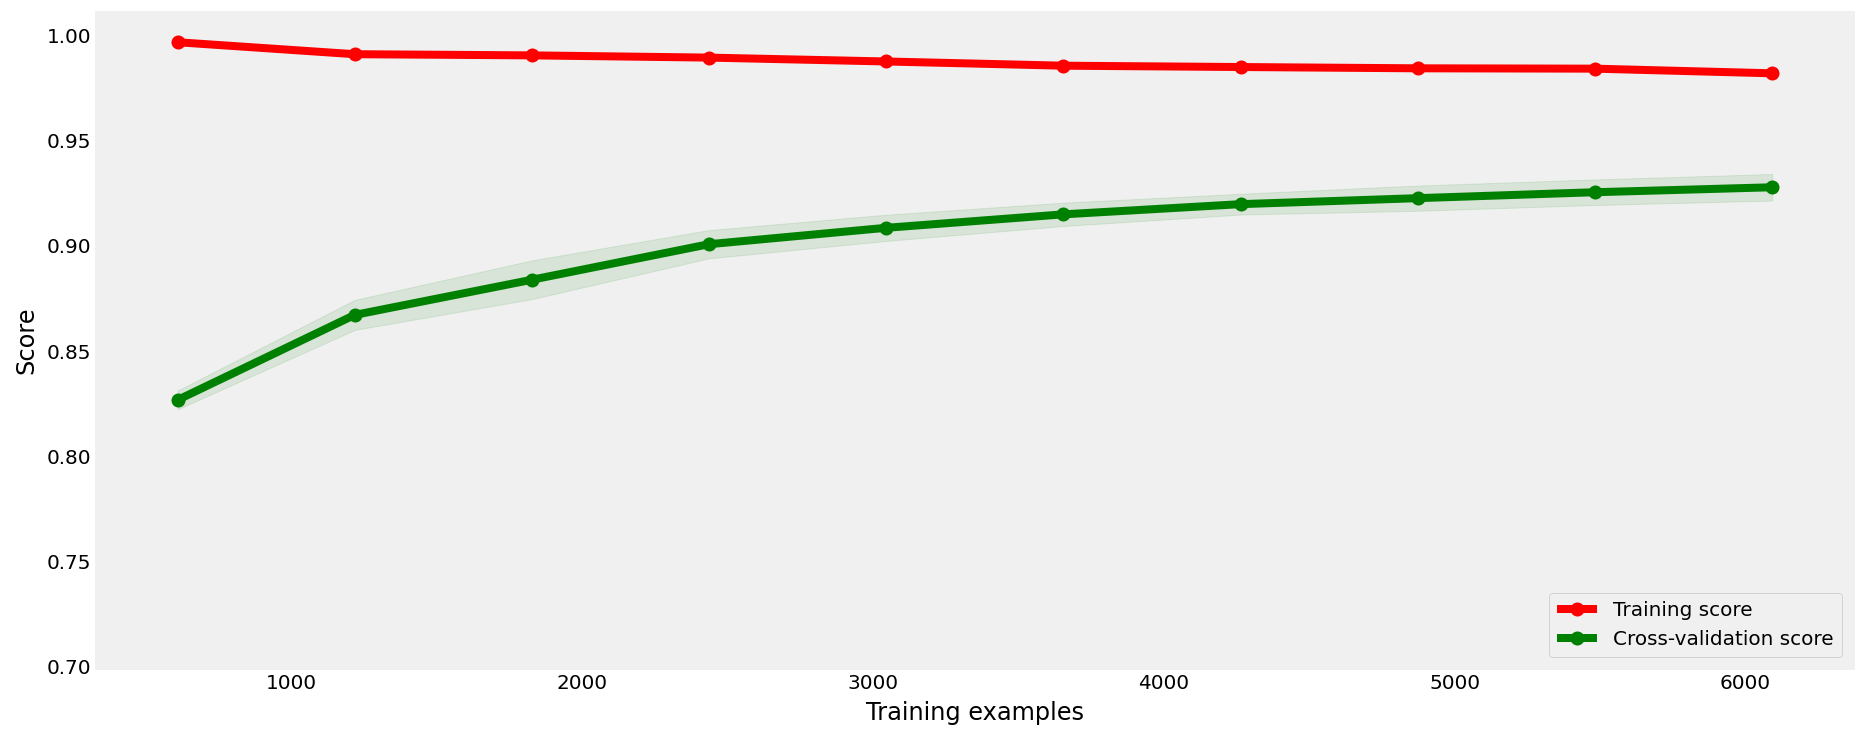

In [39]:
plot_learning_curve(X_train, y_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))
plt.show()

In [44]:
grid_svm.predict(["this article is bad"])

array([1], dtype=int64)

In [41]:
grid_svm.predict(["those tips are very good "])

array([0], dtype=int64)

In [52]:
grid_svm.predict(["this linkdin post is very bad  "])

array([1], dtype=int64)

In [43]:
grid_svm.predict(["Reading this post is a waste of time  , I don't recommend it"])

array([1], dtype=int64)

In [47]:
grid_svm.predict(["it's a great achievement "])

array([0], dtype=int64)

In [51]:
grid_svm.predict(["awful"])

array([1], dtype=int64)

In [55]:
grid_svm.predict(["it's a great achievement "])[0]

0

In [57]:
def getpositive(comment):
    if grid_svm.predict([comment])[0]==0:
        print("This is a positive a opinion") 
    else:
        print("This is a negative opinion")

In [69]:
getpositive(" this linkdin post is very bad   ")

This is a negative opinion


In [49]:
import joblib 
joblib.dump(grid_svm,"sentiment.sav") #tsagel el modéle

['sentiment.sav']